<a href="https://colab.research.google.com/github/morsheduluofc/MachineLearning/blob/main/SupportVectorRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Support Vector Regression:**

-- Some discussion: https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/

-- Code: https://towardsdatascience.com/machine-learning-basics-support-vector-regression-660306ac5226

In [ ]:
#important dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import data
data=pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/SampleData.csv')

In [ ]:
data.head()

,Hours of Study,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [ ]:
!pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-cp37-none-any.whl size=26820 sha256=423abba873d74423d00a0d69194115e58cd3537d0f77908fb41a4ed9184b676c
  Stored in directory: /root/.cache/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql


In [ ]:
import pandasql
sub_data=pandasql.sqldf('SELECT * from data ORDER BY Marks;',globals())
print(sub_data)

    Hours of Study      Marks
0        32.502345  31.707006
1        35.567830  41.412885
2        38.954769  44.847124
3        39.557901  44.862491
4        32.669044  45.570589
..             ...        ...
95       58.164540  96.769566
96       60.297327  97.379897
97       68.319361  97.919821
98       65.416052  98.591217
99       57.788224  99.051415

[100 rows x 2 columns]


In [ ]:
data.columns

Index(['Hours of Study', 'Marks'], dtype='object')

In [ ]:
data.describe()

,Hours of Study,Marks
count,100.000000,100.000000
mean,48.958341,72.035051
std,9.746379,15.200087
min,25.128485,31.707006
25%,41.526164,60.788586
50%,49.634970,72.179542
75%,56.762631,83.215080
max,70.346076,99.051415


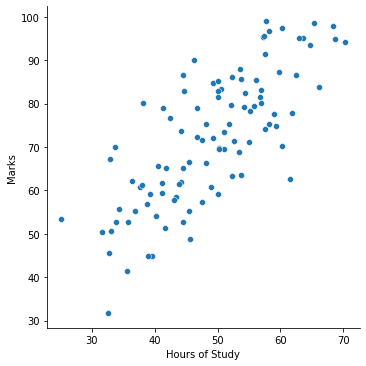

In [ ]:
sns.relplot(x='Hours of Study',y='Marks', data=data)

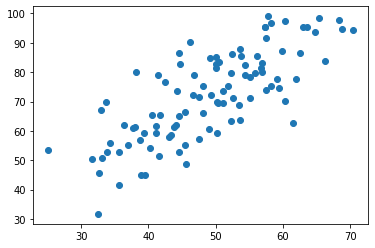

In [ ]:
plt.scatter(data['Hours of Study'],data['Marks'])

In [ ]:
#Seperate the dataset
X=data.iloc[:,0:1].values
y=data.iloc[:,1].values
y = np.array(y).reshape(-1,1)

In [ ]:
print(X.shape)
print(y.shape)

(100, 1)
(100, 1)


**Standardized the data:**

-- Link: https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
sc_Y=StandardScaler()
X=sc_X.fit_transform(X)
y=sc_X.fit_transform(y)

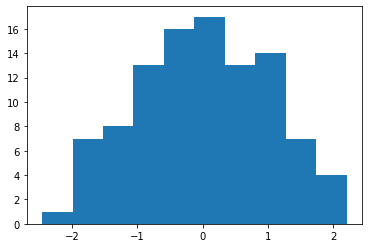

In [ ]:
plt.hist(X,bins=10);

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=2)
reg=SVR(kernel='rbf') #Radial-basis function kernel 
reg.fit(X_train,y_train.reshape(-1))

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
reg.score(X_train,y_train.reshape(-1))

0.5981389138086748

In [ ]:
y_Ptest=reg.predict(X_test)
y_Ptest=y_Ptest.reshape(-1,1)
print(y_Ptest.shape)
print(y_test.shape)

(20, 1)
(20, 1)


In [ ]:
reg.score(X_test,y_test.reshape(-1))

0.521380210291662

In [ ]:
allOutput=pd.DataFrame({'Predicted value':y_Ptest.reshape(-1),'Real_value':y_test.reshape(-1)})
print(allOutput)

    Predicted value  Real_value
0          0.860613    0.370218
1          0.322603   -0.573679
2         -0.736223    0.467325
3          0.279073    0.221213
4         -0.523240    0.717901
5         -0.725155   -1.364946
6          1.009108   -0.626338
7          1.148360    1.533620
8         -0.333847    0.463991
9          0.809709    0.222021
10        -0.745366   -1.228563
11         1.391021    1.508793
12         0.770148    1.286159
13         0.721096    0.621608
14        -1.246575   -2.666512
15         1.266652    1.755908
16        -0.253158   -0.032294
17         0.123285    0.753577
18         0.077091   -0.144635
19        -0.876657   -1.797680
